# Preparing Colab for Assignment
FAQ on this [doc](https://docs.google.com/document/d/1eZP6pzl1RKNefTja7-nU_C1k1cpVqh4Y0eVmdb3ZQa8/edit?usp=sharing).

## Utils

In [ ]:
def show_gray(img,title=""):
  """
  Function to show grayscale image
  """
  plt.imshow(img,cmap='gray')
  plt.title(title)

## Download the Dataset

In [ ]:
#taken from this StackOverflow answer: https://stackoverflow.com/a/39225039
import requests

def download_file_from_google_drive(id, destination):
    URL = "https://docs.google.com/uc?export=download"

    session = requests.Session()

    response = session.get(URL, params = { 'id' : id }, stream = True)
    token = get_confirm_token(response)

    if token:
        params = { 'id' : id, 'confirm' : token }
        response = session.get(URL, params = params, stream = True)

    save_response_content(response, destination)    

def get_confirm_token(response):
    for key, value in response.cookies.items():
        if key.startswith('download_warning'):
            return value

    return None

def save_response_content(response, destination):
    CHUNK_SIZE = 32768

    with open(destination, "wb") as f:
        for chunk in response.iter_content(CHUNK_SIZE):
            if chunk: # filter out keep-alive new chunks
                f.write(chunk)

file_id = '1Z73UHw9IS492qxHvNUiB7-DidVl_ePfg'
destination = '/content/dataset.zip'
download_file_from_google_drive(file_id, destination)

In [ ]:
!unzip -q dataset.zip
!rm -rf dataset.zip

replace dataset/Image1.png? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

# Metrics
Here you need to complete the MSE and PSNR metrics formula which will be used later on to test the automated grader. Please do not change the function definitions. Else the grader will fail.

Objective: To complete the given functions for **0.6 mark** each.


In [ ]:
import numpy as np
from skimage.metrics import mean_squared_error, peak_signal_noise_ratio

def MSE(image1,image2):
  """ 
  Mean Squared Error
  :param image1: image1
  :param image2: image2
  :rtype: float
  :return: MSE value
  """
  # [TODO]
  MSE_value= np.square(image1-image2).mean()
  return MSE_value
def PSNR(image1, image2, peak=255):
  """ 
  Peak signal-to-noise ratio
  :param image1: image1
  :param image2: image2
  :param peak: max value of pixel 8-bit image (255)
  :rtype: float
  :return: PSNR value
  """
  # [TODO]
  mse= np.square(image1-image2).mean()
  PSNR_value= 10*np.log10(peak*peak/mse)
  return PSNR_value

In [ ]:
#@title Grader { vertical-output: true }
seed =  200#@param {type:"integer"}
# Grader, please don't touch [Can run to check] [seed will be changed later]
from skimage.metrics import mean_squared_error, peak_signal_noise_ratio

np.random.seed(seed)
image1 = np.random.randint(0,256,(1280,720,3))
image2 = np.random.randint(0,256,(1280,720,3))

print(f"Skimage -> PSNR: {peak_signal_noise_ratio(image1,image2,data_range=255):.4f} | MSR: {mean_squared_error(image1,image2):.4f}")
print(f"My Func -> PSNR: {PSNR(image1,image2):.4f} | MSR: {MSE(image1,image2):.4f}")

Skimage -> PSNR: 7.7475 | MSR: 10922.7525
My Func -> PSNR: 7.7475 | MSR: 10922.7525


# Creating Noisy Images
***Objective:*** To complete the given class functions for **1 mark** each. 

>  MSE: To match within error of +- 200.0 \
  PSNR: To match within error of +- 2.0


## Salt n Pepper Noise
you can read about this more [here](https://en.wikipedia.org/wiki/Salt-and-pepper_noise).

## Gaussian Noise
you can read about this more [here](https://en.wikipedia.org/wiki/Gaussian_noise). 

In [ ]:
from skimage.util import random_noise
import numpy as np

class noisy_system():
  def example(self,img,**kwargs):
    """
    An example function to test expected return.
    You can read more about skimage.util.random_noise at https://scikit-image.org/docs/dev/api/skimage.util.html#skimage.util.random_noise
    """
    noisy_image = random_noise(img,**kwargs)
    noisy_image = np.uint8(noisy_image*255)
    return noisy_image

  def create_salt_and_pepper_noise(self,img,amount=0.05):
    """
    function to create salt and pepper noise
    :param image: input image
    :rtype: uint8 (w,h)
    :return: noisy image
    """
    # [TODO]  
    new=np.copy(img)
    row, col=new.shape
    s_vs_p=0.5

    for i in range(int(amount*s_vs_p*new.size)):
      x=np.random.randint(0,col-1)
      y=np.random.randint(0,row-1)
      new[y][x]=0

    for i in range(int(amount*(1-s_vs_p)*new.size)):
      x=np.random.randint(0,col-1)
      y=np.random.randint(0,row-1)
      new[y][x]=255

    new=new.astype(np.uint8)
    return new

  def create_gaussian_noise(self,img,mean=0,var=0.01):
    """
    function to create gaussian noise
    :param image: input image
    :rtype: uint8 (w,h)
    :return: noisy image
    """
    # [TODO]
    image=np.copy(img)
    row, col=image.shape
    sigma=var**0.5
    gauss=np.random.normal(mean,sigma,(row,col))
    gauss=gauss.reshape(row,col)
    gauss=gauss/np.max(gauss)
    image=image+10*gauss
    image=image/255
    image=image.astype(np.uint8)

    return image

Total Time taken: 1.03s

Statistics:
Example   => SNP -> PSNR: 44.31 | MSE: 2.41
Example   => GSN -> PSNR: 29.93 | MSE: 66.14
My Func   => SNP -> PSNR: 44.41 | MSE: 2.36
My Func   => GSN -> PSNR: 31.50 | MSE: 46.03


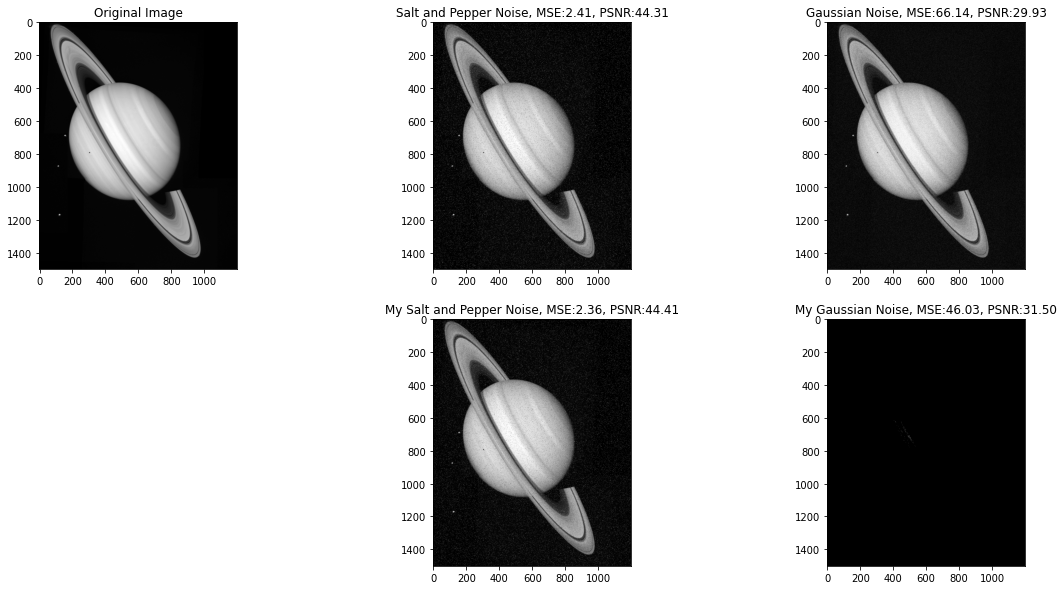

In [ ]:
#@title Grader { vertical-output: true, display-mode: "form" }
image_number = 8 #@param {type:"slider", min:1, max:10, step:1}
# Grader, please don't touch [Can run to check] [will be graded on an image decided later]
# %%timeit 
%matplotlib inline
import cv2
import time
import matplotlib.pyplot as plt
from IPython.display import clear_output

clear_output(wait=True)

start = time.time()

noise_maker               = noisy_system()
image                     = cv2.imread(f"/content/dataset/Image{image_number}.png")
image                     = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

salt_and_pepper_example   = noise_maker.example(image.copy(),mode="s&p")
gaussian_example          = noise_maker.example(image.copy(),mode="gaussian")
salt_and_pepper_image     = noise_maker.create_salt_and_pepper_noise(image.copy())
gaussian_image            = noise_maker.create_gaussian_noise(image.copy())

end = time.time()
print(f"Total Time taken: {end-start:.2f}s\n")
print("Statistics:")
print(f"Example   => SNP -> PSNR: {PSNR(salt_and_pepper_example,image):.2f} | MSE: {MSE(salt_and_pepper_example,image):.2f}")
print(f"Example   => GSN -> PSNR: {PSNR(gaussian_example,image):.2f} | MSE: {MSE(gaussian_example,image):.2f}")
print(f"My Func   => SNP -> PSNR: {PSNR(salt_and_pepper_image,image):.2f} | MSE: {MSE(salt_and_pepper_image,image):.2f}")
print(f"My Func   => GSN -> PSNR: {PSNR(gaussian_image,image):.2f} | MSE: {MSE(gaussian_image,image):.2f}")


plt.figure(figsize=(20,10))
plt.subplot(2,3,1)
show_gray(image,"Original Image")
plt.subplot(2,3,2)
show_gray(salt_and_pepper_example,
          f"Salt and Pepper Noise, MSE:{MSE(image,salt_and_pepper_example):.2f}, PSNR:{PSNR(image,salt_and_pepper_example):.2f}")
plt.subplot(2,3,3)
show_gray(gaussian_example,
          f"Gaussian Noise, MSE:{MSE(image,gaussian_example):.2f}, PSNR:{PSNR(image,gaussian_example):.2f}")
plt.subplot(2,3,5)
show_gray(salt_and_pepper_image,
          f"My Salt and Pepper Noise, MSE:{MSE(image,salt_and_pepper_image):.2f}, PSNR:{PSNR(image,salt_and_pepper_image):.2f}")
plt.subplot(2,3,6)
show_gray(gaussian_image,
          f"My Gaussian Noise, MSE:{MSE(image,gaussian_image):.2f}, PSNR:{PSNR(image,gaussian_image):.2f}")
plt.show()

# Non Local Means

***Primary Objective:*** To complete Non Local Means denoiser. **2 marks** for completetion.

***Secondary Objective:*** 
1. To optimise for **MSE**. (out of 1 mark *relatively*)
2. To optimise for **time**.  (out of 1 mark *relatively*)

In [ ]:
import numpy as np
import warnings
import numba, cv2
# warnings.filterwarnings('ignore')
class NLMeans():
  """
  Non Local Means, donot change the solve function. You may add any other class 
  functions or other functions in the colab file. but refrain for function/class
  definitions already given. These will be used to grade later on.
  """
  def example(self,img,**kwargs):
    denoised_image = cv2.fastNlMeansDenoising(img,**kwargs)
    return denoised_image

  @numba.jit()
  
  def nlm(self,img,h,small_window,big_window):
    img=img.astype(float)
    row,col=img.shape
    new = np.zeros(img.shape)
    pad_img=np.pad(img,big_window//2+small_window//2,mode='reflect')
    show_gray(pad_img)
    pad_length=small_window//2+big_window//2
    for ik in np.arange(pad_length,row+pad_length):
      for jk in np.arange(pad_length,col+pad_length):
        centre=pad_img[ik-small_window//2:ik+small_window//2+1,jk-small_window//2:jk+small_window//2+1]
        
        weight=np.zeros((big_window,big_window))
        for a in np.arange(ik-big_window//2,ik+big_window//2+1):
          for b in np.arange(jk-big_window//2,jk+big_window//2+1):
            sw=pad_img[a-small_window//2:a+small_window//2+1,b-small_window//2:b+small_window//2+1]
            m=np.mean(np.square(sw-centre))
            weight[a-(ik-big_window//2)][b-(jk-big_window//2)] = -m/(h*h)
        weight = np.exp(weight)
        weight /= np.sum(weight)
        new[ik-pad_length][jk-pad_length] = np.sum(weight*pad_img[ik-big_window//2:ik+big_window//2+1,jk-big_window//2:jk+big_window//2+1])
    new[new>255] = 255
    new[new<0] = 0
    new = np.uint8(new)
    return new

  def solve(self,img,h=30,small_window=7,big_window=21):
    return self.nlm(img, h, small_window, big_window)

  # best h for Gaussian=24
  # best h for salt and pepper= 30

(Inbuilt) Time taken: 0.27s

(My function) Time taken: 20.28s

Statistics:
salt_and_paper_h: 30 , gaussian_h: 24

Noisy   => SNP -> PSNR: 41.33 | MSE: 4.79
Noisy   => GSN -> PSNR: 28.66 | MSE: 88.48
Skimage => SNP -> PSNR: 32.53 | MSE: 36.34
Skimage => GSN -> PSNR: 31.38 | MSE: 47.36
My Func => SNP -> PSNR: 32.46 | MSE: 36.89
My Func => GSN -> PSNR: 31.43 | MSE: 46.74



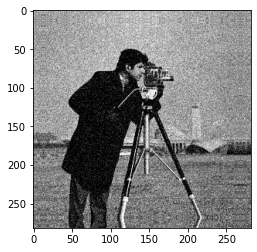

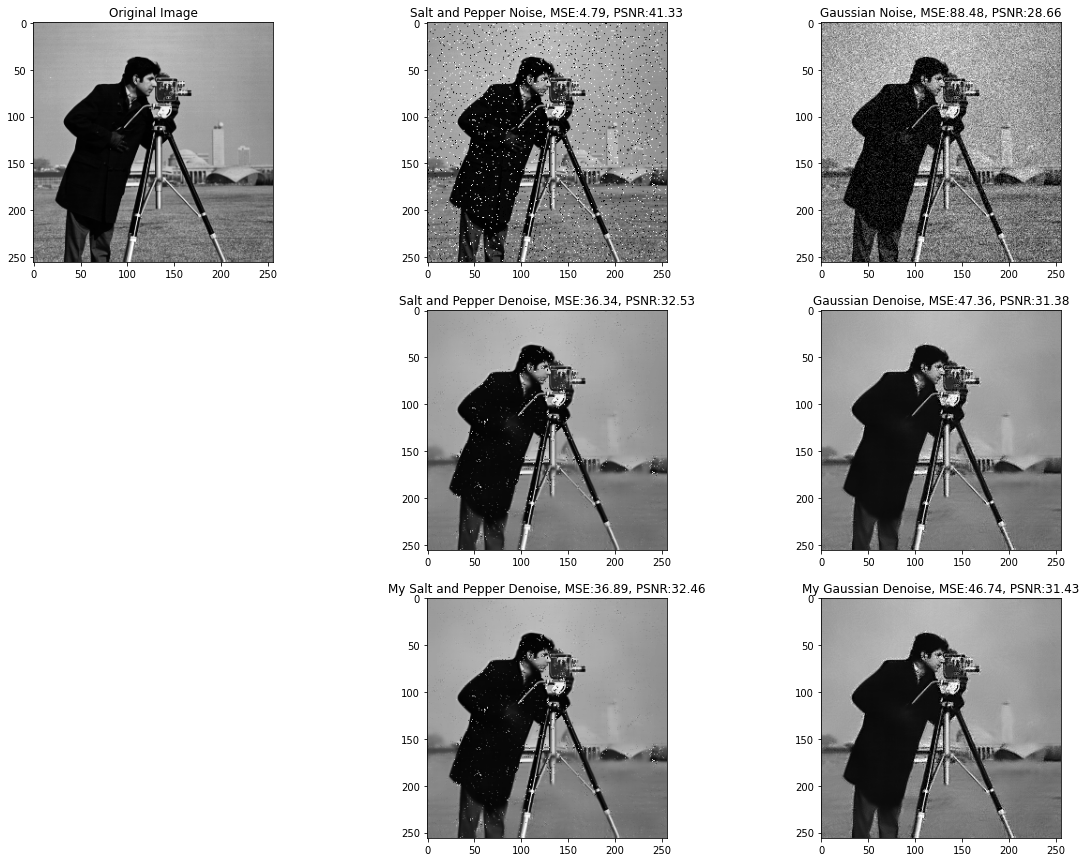

In [ ]:
#@title Grader { vertical-output: true, display-mode: "form" }
image_number = 3 #@param {type:"slider", min:1, max:10, step:1}
salt_and_paper_h =   30#@param {type:"integer"}
gaussian_h =         24#@param {type:"integer"}
 
# Grader, please don't touch [Can run to check] [will be graded on an image decided later]
# %%timeit 
%matplotlib inline
import cv2
import time
import matplotlib.pyplot as plt
from IPython.display import clear_output
 
clear_output(wait=True)
 
 
denoiser                    = NLMeans()
image                       = cv2.imread(f"/content/dataset/Image{image_number}.png")
image                       = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
 
salt_and_pepper_example     = noise_maker.example(image.copy(),mode="s&p")
gaussian_example            = noise_maker.example(image.copy(),mode="gaussian")
 
start = time.time()
 
salt_and_pepper_denoise     = denoiser.example(salt_and_pepper_example.copy(),h=salt_and_paper_h)
gaussian_denoise            = denoiser.example(gaussian_example.copy(),h=gaussian_h)
 
end = time.time()
print(f"(Inbuilt) Time taken: {end-start:.2f}s\n")
 
start = time.time()
 
my_salt_and_pepper_denoise  = denoiser.solve(salt_and_pepper_example.copy(),h=salt_and_paper_h)
my_gaussian_denoise         = denoiser.solve(gaussian_example.copy(),h=gaussian_h)
 
end = time.time()
print(f"(My function) Time taken: {end-start:.2f}s\n")
 
print("Statistics:")
print(f"salt_and_paper_h: {salt_and_paper_h} , gaussian_h: {gaussian_h}\n")
print(f"Noisy   => SNP -> PSNR: {PSNR(salt_and_pepper_example,image):.2f} | MSE: {MSE(salt_and_pepper_example,image):.2f}")
print(f"Noisy   => GSN -> PSNR: {PSNR(gaussian_example,image):.2f} | MSE: {MSE(gaussian_example,image):.2f}")
print(f"Skimage => SNP -> PSNR: {PSNR(salt_and_pepper_denoise,image):.2f} | MSE: {MSE(salt_and_pepper_denoise,image):.2f}")
print(f"Skimage => GSN -> PSNR: {PSNR(gaussian_denoise,image):.2f} | MSE: {MSE(gaussian_denoise,image):.2f}")
print(f"My Func => SNP -> PSNR: {PSNR(my_salt_and_pepper_denoise,image):.2f} | MSE: {MSE(my_salt_and_pepper_denoise,image):.2f}")
print(f"My Func => GSN -> PSNR: {PSNR(my_gaussian_denoise,image):.2f} | MSE: {MSE(my_gaussian_denoise,image):.2f}\n")
 
plt.figure(figsize=(20,15))
plt.subplot(3,3,1)
show_gray(image,"Original Image")
plt.subplot(3,3,2)
show_gray(salt_and_pepper_example,
          f"Salt and Pepper Noise, MSE:{MSE(image,salt_and_pepper_example):.2f}, PSNR:{PSNR(image,salt_and_pepper_example):.2f}")
plt.subplot(3,3,3)
show_gray(gaussian_example,
          f"Gaussian Noise, MSE:{MSE(image,gaussian_example):.2f}, PSNR:{PSNR(image,gaussian_example):.2f}")
plt.subplot(3,3,5)
show_gray(salt_and_pepper_denoise,
          f"Salt and Pepper Denoise, MSE:{MSE(image,salt_and_pepper_denoise):.2f}, PSNR:{PSNR(image,salt_and_pepper_denoise):.2f}")
plt.subplot(3,3,6)
show_gray(gaussian_denoise,
          f"Gaussian Denoise, MSE:{MSE(image,gaussian_denoise):.2f}, PSNR:{PSNR(image,gaussian_denoise):.2f}")
plt.subplot(3,3,8)
show_gray(my_salt_and_pepper_denoise,
          f"My Salt and Pepper Denoise, MSE:{MSE(image,my_salt_and_pepper_denoise):.2f}, PSNR:{PSNR(image,my_salt_and_pepper_denoise):.2f}")
plt.subplot(3,3,9)
show_gray(my_gaussian_denoise,
          f"My Gaussian Denoise, MSE:{MSE(image,my_gaussian_denoise):.2f}, PSNR:{PSNR(image,my_gaussian_denoise):.2f}")
plt.show()

# Gaussian Filtering Comparison

***Objective:*** Show comparison between NL Means denoising and Gaussian Denoising.  **0.8 mark**

In [ ]:
class GaussianFilter():
  """
  GaussianFilter, donot change the solve function. You may add any other class 
  functions or other functions in the colab file. but refrain for function/class
  definitions already given. These will be used to grade later on.
  """

  def solve(self, img, ksize=(5,5), sigma_x=0):
    """
    Solve function to perform gaussian filtering.

    :param img: noisy image
    :param ksize: representing the size of the kernel.
    :param sigma_x: standard deviation in X direction
    :rtype: uint8 (w,h)
    :return: solved image
    """
    # [TODO] Can use cv2 inbuilt 
    new=cv2.GaussianBlur(img,ksize,sigma_x)
    return new